25.0
50.0
75.0
100.0


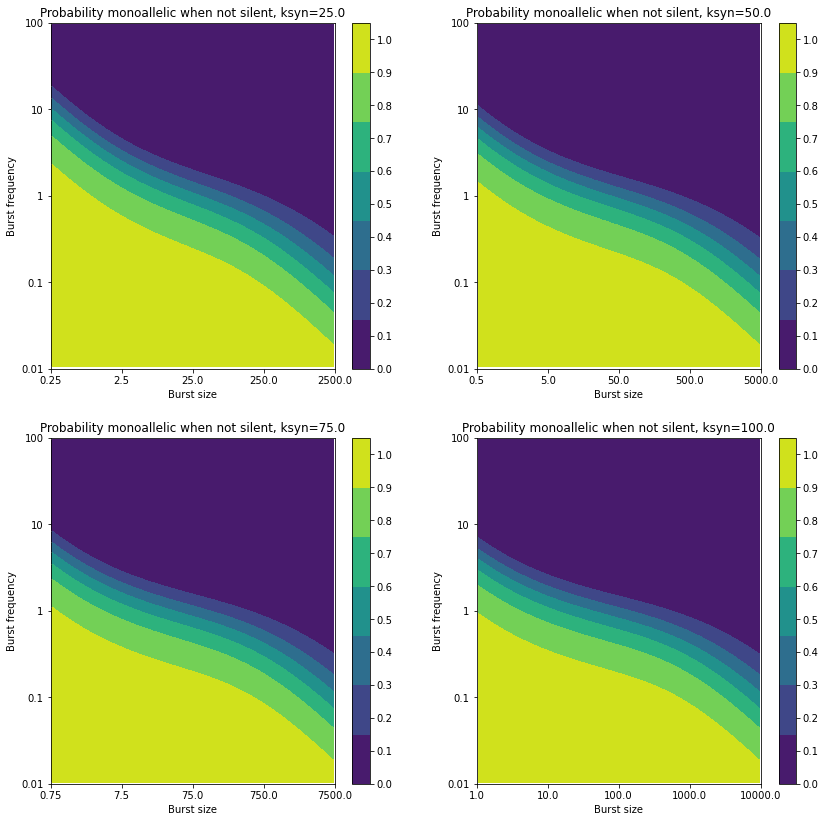

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from inference.simulation import sim_beta_poisson
from scipy import special
from scipy.stats import poisson,norm
from scipy.special import j_roots
from scipy.special import beta as beta_fun  
def fraction_monoallelic_of_all_cells(kon, koff, ksyn=100, deg=1, nr_cells=1000):
    # parameters are per allele = making total transcription the double
    # reports fraction monoallelic of cells with expression
    mat_rnas = sim_beta_poisson(kon, koff, ksyn, nr_cells)
    pat_rnas = sim_beta_poisson(kon, koff, ksyn, nr_cells)
    biallelic = sum([1 for m,p in zip(mat_rnas, pat_rnas) if (m>0 and p>0)])
    silent = sum([1 for m,p in zip(mat_rnas, pat_rnas) if (m==0 and p==0)])
    if silent == nr_cells: return np.nan
    return (nr_cells-biallelic-silent)/float(nr_cells)
def getProbNoExpr(params):
    kon = params[0]
    koff = params[1]
    ksyn = params[2]
    return dBP_dict(np.array([0]),kon,koff,ksyn)[0]
def dBP_dict(at, alpha, bet, lam):
    at_ = np.copy(at)
    at_.shape = (len(at_), 1)
    np.repeat(at_, 40, axis = 1)
    def fun(at_, m):
        if(max(m) < 1e6):
            return(poisson.pmf(at_,m))
        else:
            return(norm.pdf(at_,loc=m,scale=sqrt(m)))
    x,w = j_roots(40,alpha = bet - 1, beta = alpha - 1)
    gs = np.sum(w*fun(at_, m = lam*(1+x)/2), axis=1)
    prob = 1/beta_fun(alpha, bet)*2**(-alpha-bet+1)*gs
    return {k: v for k, v in zip(at.tolist(), prob.tolist())}
plt.figure(figsize=(14,14))

increments = 100
kons = np.logspace(-3, 2, increments) + 0.0
koffs = np.logspace(-2, 2, increments) + 0.0
fmono = np.zeros((increments,increments)) + 0.0
size = 200
v = np.linspace(0, 1, 11, endpoint=True)
for ksyn, i in zip((25.,50.,75.,100.),(1,2,3,4)):
    print(ksyn)
    for kidx, koff in enumerate(koffs):
        for k2idx, kon in enumerate(kons):
            p = getProbNoExpr([kon, koff, ksyn])
            fmono[kidx,k2idx] = 2*((1-p)*p)/(1-p**2)
    plt.subplot(2,2,i)
    plt.contourf(np.fliplr(fmono.T), origin='lower')
    plt.xlabel("Burst size")
    plt.ylabel("Burst frequency")
    plt.title("Probability monoallelic when not silent, ksyn=%.1f" % ksyn)
    plt.colorbar(ticks=v)
    plt.xticks(np.linspace(0,increments,5), (ksyn/100,ksyn/10,ksyn/1, ksyn/0.1,ksyn/0.01))
    plt.yticks(np.linspace(0,increments,5), (0.01, 0.1,1,10,100))
plt.savefig('figures/Fig1C.pdf')
plt.show()


25.0
50.0
75.0
100.0


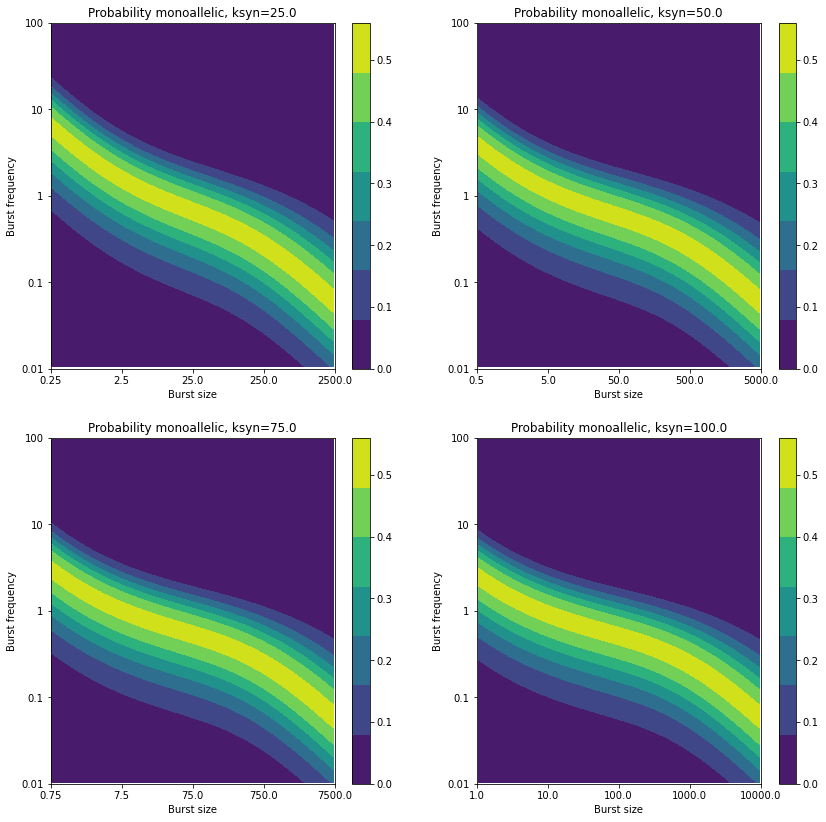

In [4]:
plt.figure(figsize=(14,14))

increments = 100
kons = np.logspace(-3, 2, increments) + 0.0
koffs = np.logspace(-2, 2, increments) + 0.0
fmono = np.zeros((increments,increments)) + 0.0
size = 200

v = np.linspace(0, 1, 11, endpoint=True)
for ksyn, i in zip((25.,50.,75.,100.),(1,2,3,4)):
    print(ksyn)
    for kidx, koff in enumerate(koffs):
        for k2idx, kon in enumerate(kons):
            p = getProbNoExpr([kon, koff, ksyn])
            fmono[kidx,k2idx] = 2*((1-p)*p)
    plt.subplot(2,2,i)
    plt.contourf(np.fliplr(fmono.T), origin='lower')
    plt.xlabel("Burst size")
    plt.ylabel("Burst frequency")
    plt.title("Probability monoallelic, ksyn=%.1f" % ksyn)
    plt.colorbar(ticks=v)
    plt.xticks(np.linspace(0,increments,5), (ksyn/100,ksyn/10,ksyn/1, ksyn/0.1,ksyn/0.01) )
    plt.yticks(np.linspace(0,increments,5), (0.01, 0.1,1,10,100))
plt.savefig('figures/Fig1D.pdf')
plt.show()